 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_daily_return = whale_data.sort_index()
whale_daily_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_daily_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_daily_return = whale_data.dropna()
whale_daily_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_daily_return = algo_data.sort_index()
algo_daily_return.dtypes
#algo_daily_return.head()

Algo 1    float64
Algo 2    float64
dtype: object

In [6]:
# Count nulls
algo_daily_return.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_daily_return = algo_data.dropna()
algo_daily_return.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_daily_return = sp500_data.sort_index(ascending = True)
sp500_daily_return




,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].str.replace('$','')
sp500_data['Close'] = sp500_data['Close'].astype('float')
sp500_data['Close'].dtype

C:\Users\Lumina\AppData\Local\Temp/ipykernel_10300/515850326.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data['Close'] = sp500_data['Close'].str.replace('$','')


dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_daily_return = sp500_data.pct_change()
sp500_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_daily_return = sp500_daily_return.dropna()
sp500_daily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return = sp500_daily_return.rename(columns = {"Close":"S&P500 Close"})
sp500_daily_return

,S&P500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily = pd.concat([whale_daily_return, algo_daily_return, sp500_daily_return], axis = "columns", join = "inner")
combined_daily_return = combined_daily.dropna()
combined_daily_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

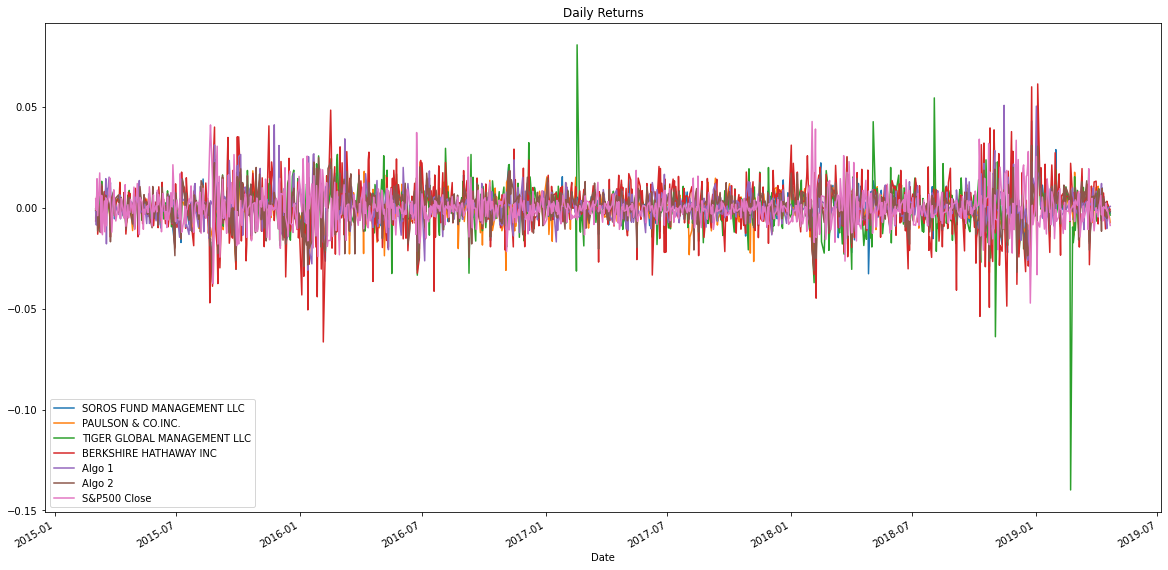

In [15]:
# Plot daily returns of all portfolios
combined_daily_return.plot(title = "Daily Returns", figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

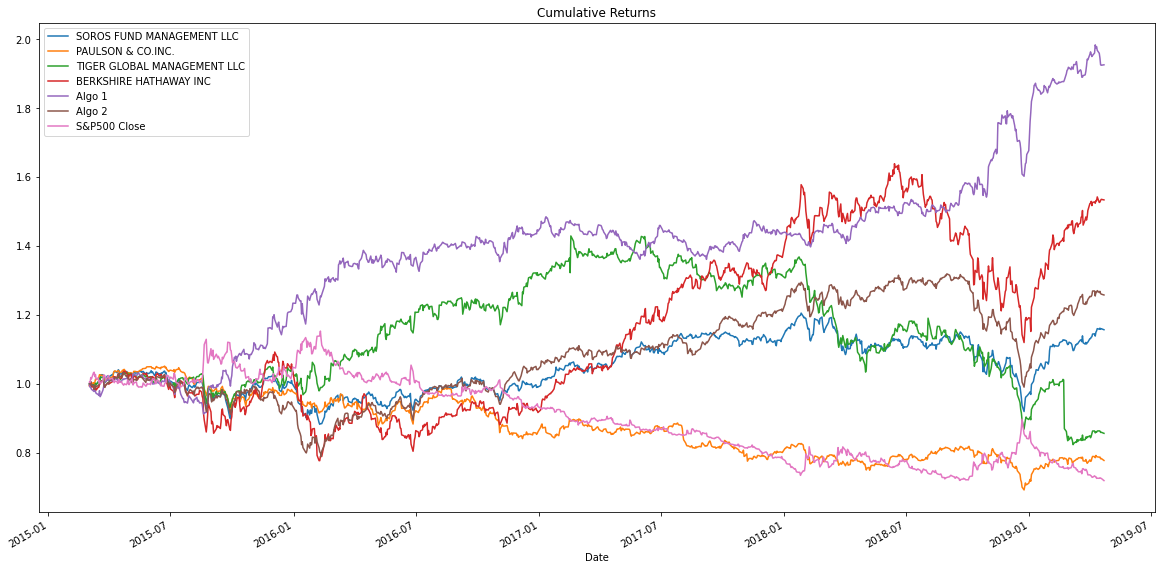

In [16]:
# Calculate cumulative returns of all portfolios
combined_cumulative_return = (1 + combined_daily_return).cumprod()

# Plot cumulative returns
combined_cumulative_return.plot(title='Cumulative Returns', figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

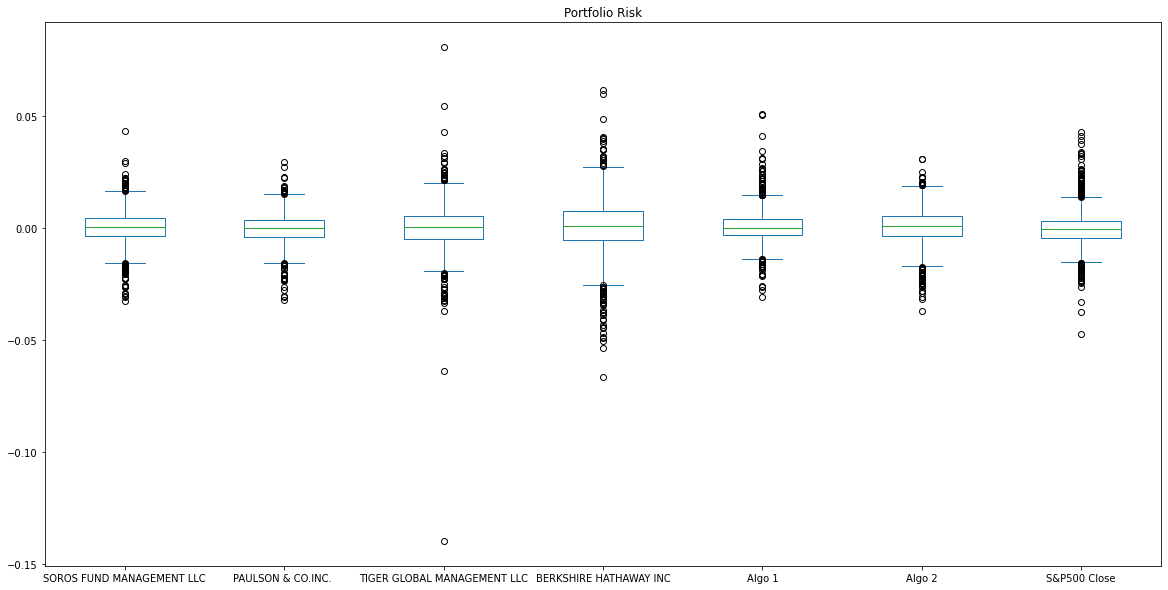

In [17]:
# Box plot to visually show risk
combined_daily_return.plot(kind = "box", title = 'Portfolio Risk', figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_daily_return.std().sort_values(ascending=True)
combined_daily_std


PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P500 Close                   0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500
combined_daily_return['S&P500 Close'].std()

0.00858688974707399

In [20]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 = [combined_daily_std > combined_daily_std['S&P500 Close']]
portfolios_riskier_than_SP500

[PAULSON & CO.INC.              False
 Algo 1                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 2                         False
 S&P500 Close                   False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_daily_std * np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500 Close                   0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'All Portfolios: 21 Day Rolling Standard Deviation'}, xlabel='Date'>

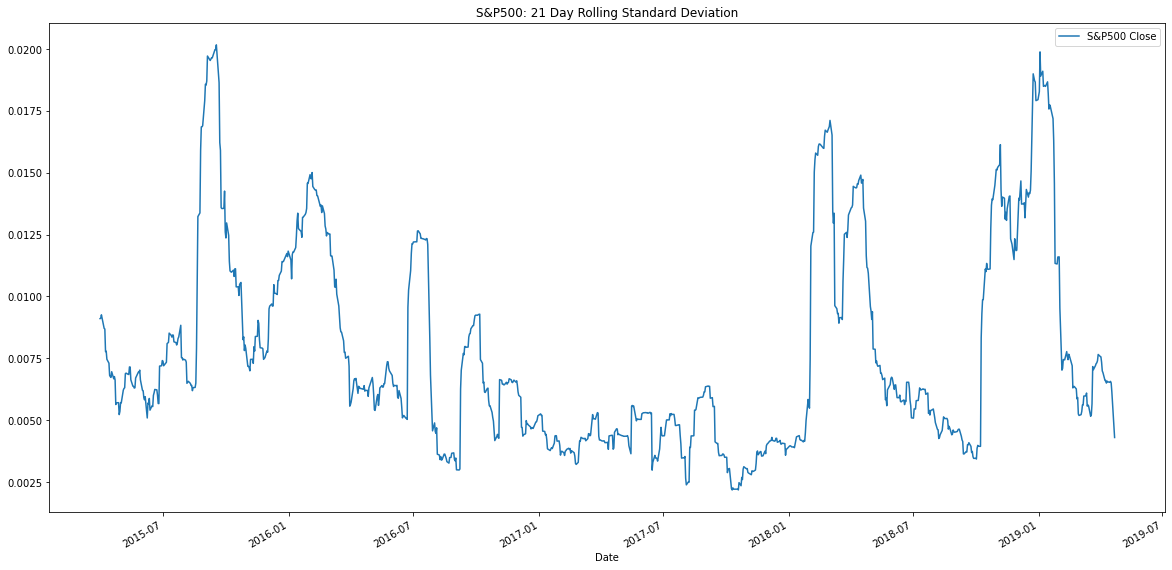

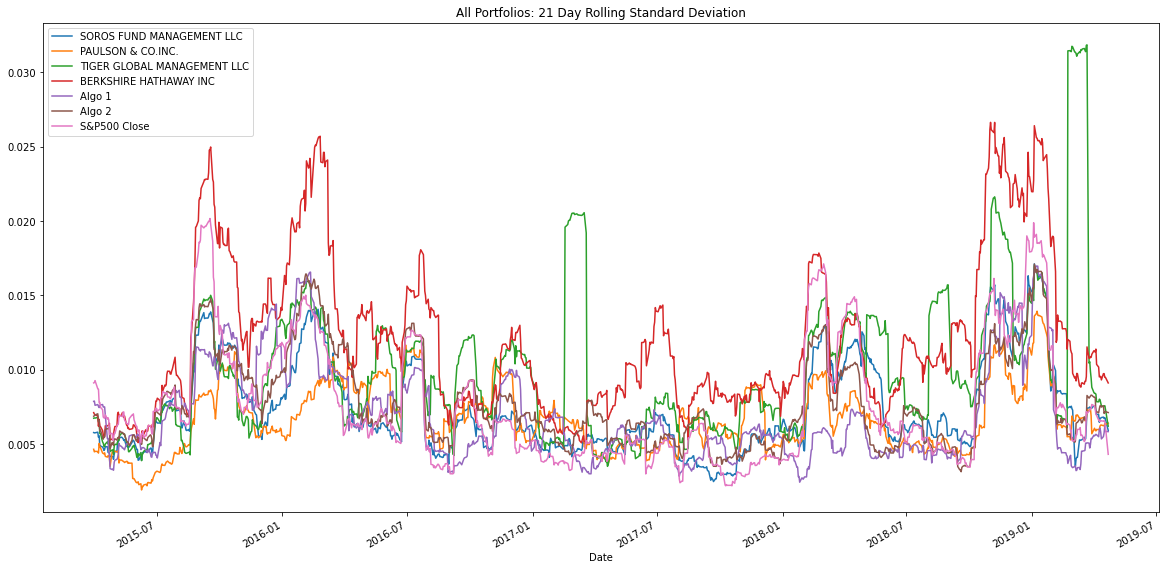

In [22]:
#*This question reads to find 21-day rolling STD for S&P500 separately, then for all portfolios* 

# Calculate the rolling standard deviation for the S&P 500 using a 21-day window
sp500_rolling_21days = combined_daily_return[["S&P500 Close"]].rolling(window = 21).std()
# Plot the rolling standard deviation for the S&P 500 using a 21-day window; then also plot for all portfolios
sp500_rolling_21days.plot(title="S&P500: 21 Day Rolling Standard Deviation", figsize = (20,10))

# Calculate the rolling standard deviation for the S&P 500 using a 21-day window
combined_rolling_21days = combined_daily_return.rolling(window = 21).std()
combined_rolling_21days.plot(title="All Portfolios: 21 Day Rolling Standard Deviation", figsize = (20,10))

### Calculate and plot the correlation

In [23]:
# View the combined daily return dataframe
combined_daily_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [24]:
# Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
correlation = combined_daily_return.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500 Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

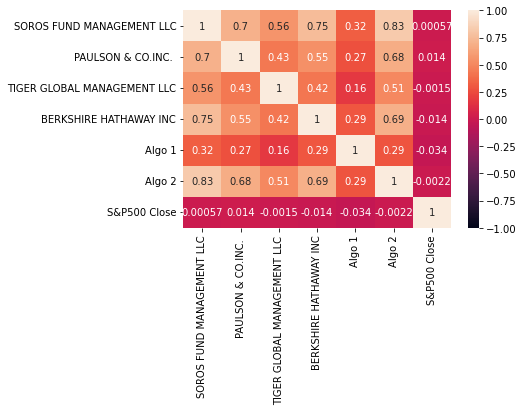

In [25]:
# Plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True)
## NOTE: The closer 'r' is to 1, the stronger the positive association between two quantitive variables

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [26]:
# Calculate covariance of a single portfolio
BH_sp500_covariance = combined_daily_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_daily_return['S&P500 Close'])
BH_sp500_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000009
2019-04-16    0.000006
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000007
Length: 1042, dtype: float64

In [27]:
# Calculate variance of S&P 500
rolling_variance_sp500 = combined_daily_return['S&P500 Close'].rolling(window=60).var()
rolling_variance_sp500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500 Close, Length: 1042, dtype: float64

In [28]:
# Computing beta
BH_sp500_beta = BH_sp500_covariance / rolling_variance_sp500
BH_sp500_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.213991
2019-04-16    0.150997
2019-04-17    0.144171
2019-04-18    0.144017
2019-04-22    0.185516
Length: 1042, dtype: float64

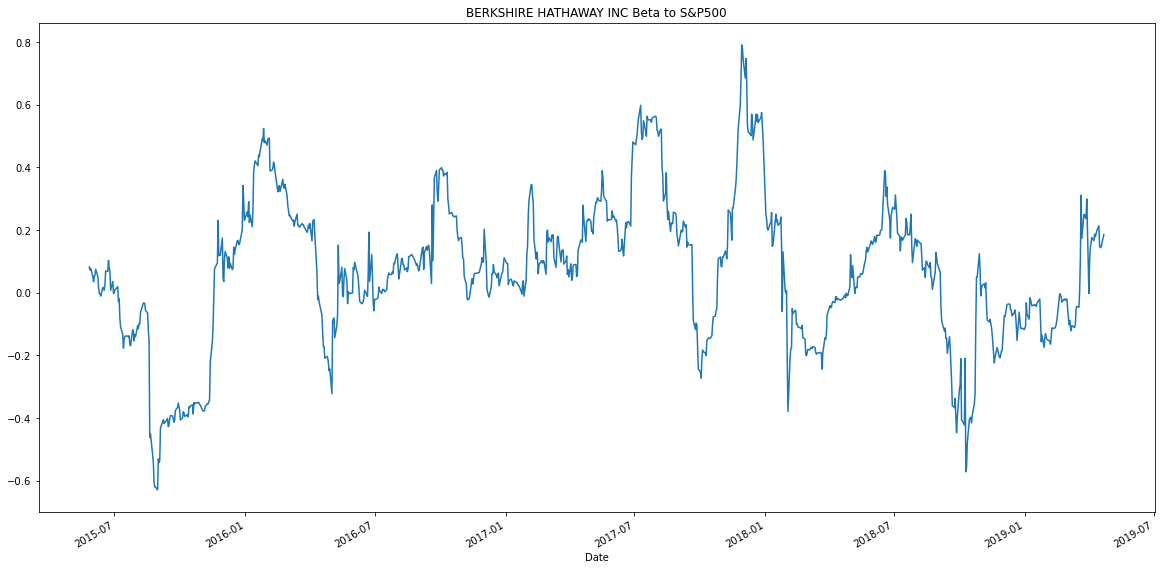

In [29]:
# Plot beta trend
BH_sp500_beta_plot = BH_sp500_beta.plot(title="BERKSHIRE HATHAWAY INC Beta to S&P500", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

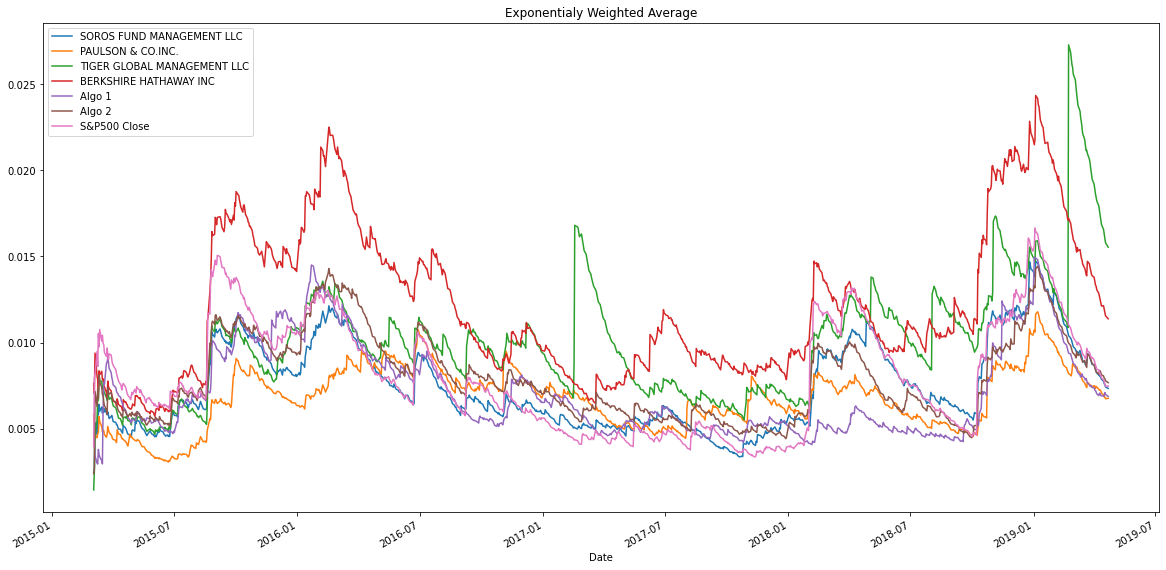

In [30]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = combined_daily_return.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_daily_return.mean() * 252) / (combined_daily_return.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500 Close                  -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

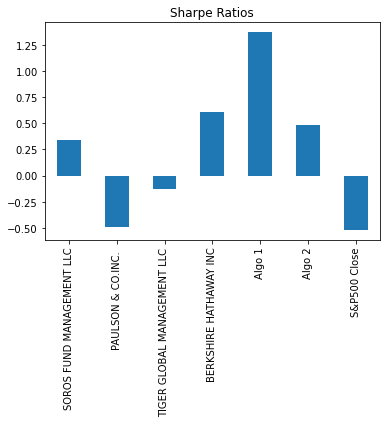

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [33]:
# Both Algo1 and Algo2 performed better than the rest of the compared market, relative to the risk; Algo 1 has the highest Sharpe Ratio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [34]:
# Reading data from 1st stock
goog_csv = Path("Resources/goog_historical.csv")
goog_csv = pd.read_csv(goog_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_csv = goog_csv.sort_index()
goog_csv = goog_csv.rename(columns = {"NOCP":"GOOG NOCP"})
goog_csv = goog_csv.drop(columns=['Symbol'])
goog_csv.head()

,GOOG NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [35]:
# Reading data from 2nd stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_csv = pd.read_csv(aapl_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index().rename(columns = {"NOCP":"AAPL NOCP"}).drop(columns=['Symbol'])
aapl_csv.head()

,AAPL NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [36]:
# Reading data from 3rd stock
cost_csv = Path("Resources/cost_historical.csv")
cost_csv = pd.read_csv(cost_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index().rename(columns = {"NOCP":"COST NOCP"}).drop(columns=['Symbol'])
cost_csv.head()

,COST NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [37]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_csv, aapl_csv, cost_csv], axis = "columns", join="inner")
combined_df = combined_df.sort_index()
combined_df

,GOOG NOCP,AAPL NOCP,COST NOCP
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [38]:
# Reset Date index
#ok?

In [39]:
# Reorganize portfolio data by having a column per symbol
#ok

In [40]:
# Calculate daily returns
custom_daily_returns = combined_df.pct_change()

# Drop NAs
custom_daily_returns = custom_daily_returns.dropna()

# Display sample data
custom_daily_returns.head()

,GOOG NOCP,AAPL NOCP,COST NOCP
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = custom_daily_returns.dot(weights)

# Display sample data
portfolio_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_weighted_returns = portfolio_weighted_returns.rename("Custom")
full_returns = pd.concat((portfolio_weighted_returns, combined_daily_return), axis = 1, join = "inner")
full_returns

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# full_returns.dropna()
# full_returns


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
full_annualized_std = full_returns.std() * np.sqrt(252)
full_annualized_std

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P500 Close                   0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'All Portfolios: 21 Day Rolling Standard Deviation'}>

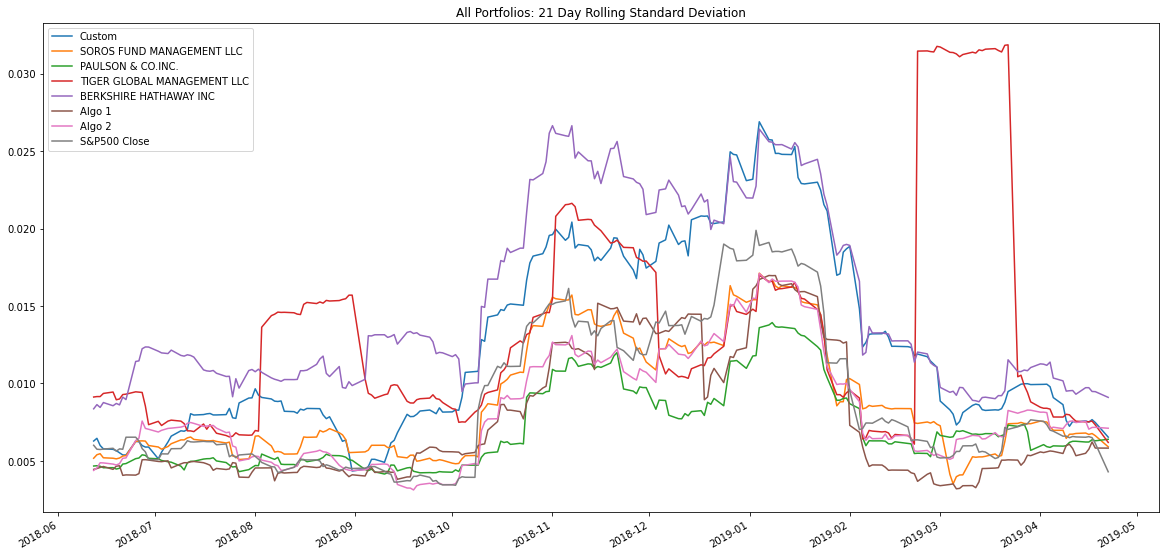

In [45]:
# Calculate rolling standard deviation
all_rolling_21days = full_returns.rolling(window = 21).std()

# Plot rolling standard deviation
all_rolling_21days.plot(title="All Portfolios: 21 Day Rolling Standard Deviation", figsize = (20,10))

### Calculate and plot the correlation

In [46]:
# Calculate and plot the correlation
full_correlation = full_returns.corr()
full_correlation

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Custom,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
S&P500 Close,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


<AxesSubplot:>

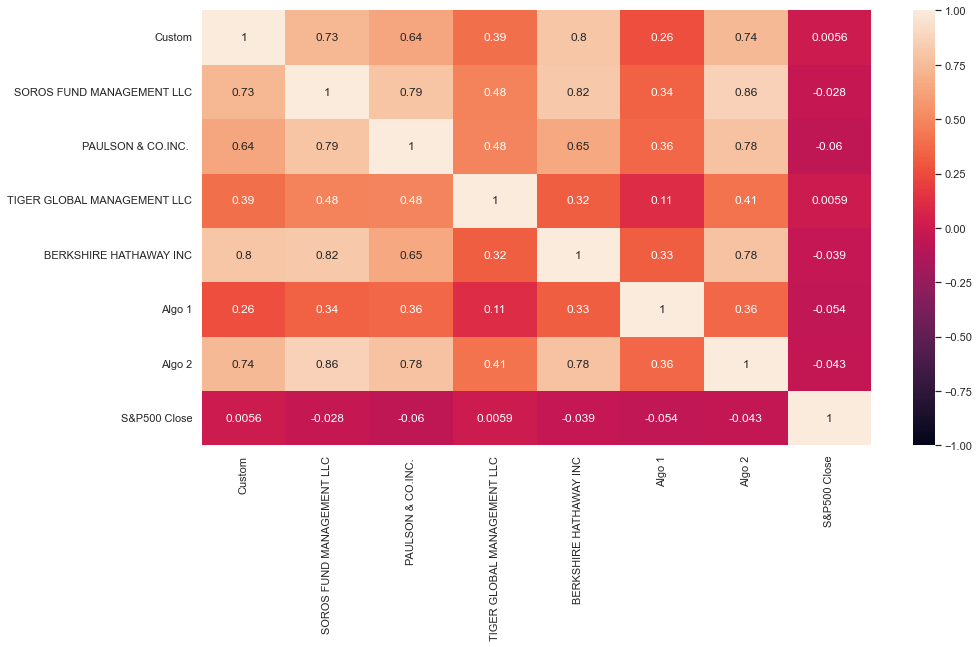

In [47]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(full_correlation, vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

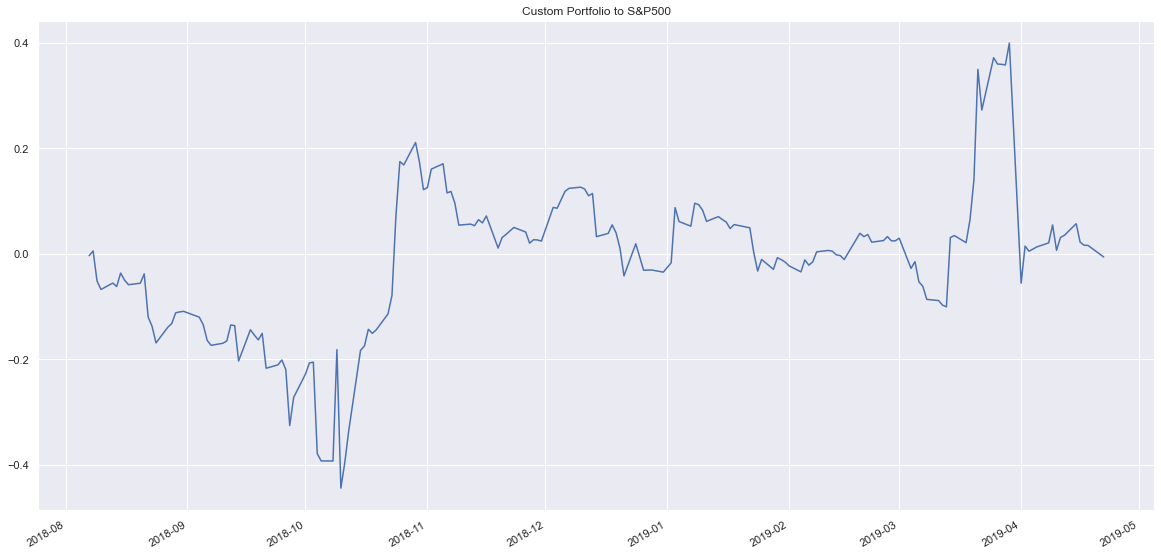

In [49]:
# Calculate and plot Beta

# Covariance
custom_sp500_covariance = full_returns['Custom'].rolling(window=60).cov(full_returns['S&P500 Close']).dropna()
custom_sp500_covariance

# Variance of S&P500
custom_rolling_variance = full_returns['S&P500 Close'].rolling(window=60).var()
custom_rolling_variance

# Beta
custom_beta = custom_sp500_covariance / custom_rolling_variance
custom_beta

# Plot
custom_beta_plot = custom_beta.plot(title="Custom Portfolio to S&P500", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
full_sharpe_ratio = (full_returns.mean() * 252) / (full_returns.std() * np.sqrt(252))
full_sharpe_ratio

Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P500 Close                  -0.427676
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios (Full data)'}>

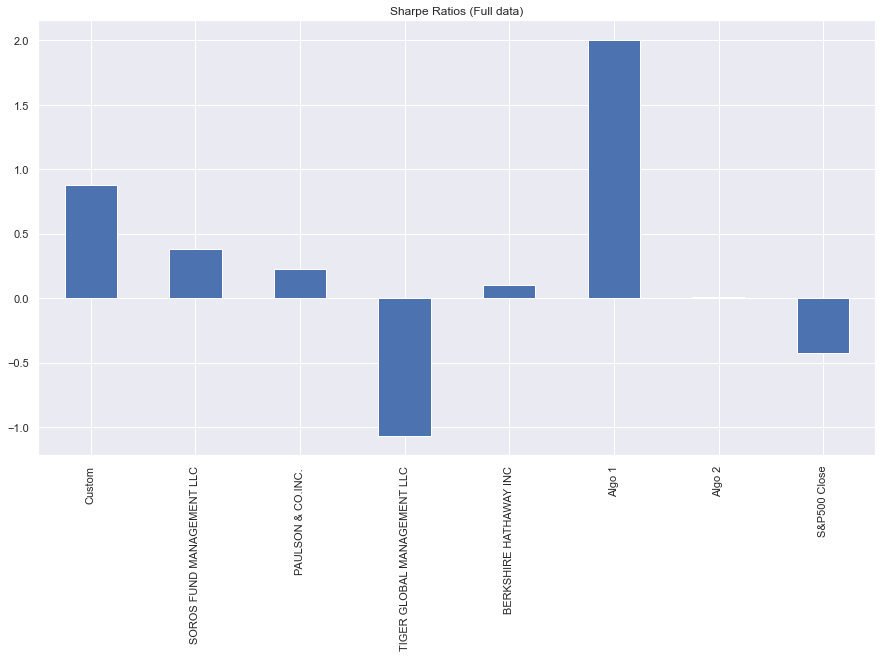

In [51]:
# Visualize the sharpe ratios as a bar plot
full_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios (Full data)")

### How does your portfolio do?

Write your answer here!

In [52]:
# Not bad, but Algo1 is ahead